In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


C:\Users\ekim298\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# a. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
OJ = load_data('OJ')

# purchase CH means that the customer purchased Citrus Hill orange juice, MM means that the customer purchased Minute Maid orange juice, and both means that the customer purchased both brands. The variable Purchase is a factor with levels CH, MM, and both indicating which brand of orange juice was purchased by the customer.
print(OJ['Purchase'].value_counts())
# convert outcome variable of the loaed data to binary
OJ['Purchase'] = (OJ['Purchase'] == 'MM').astype(int)
print(OJ['Purchase'].value_counts())
# convert the store variable to binary
OJ['Store7'] = (OJ['Store7'] == 'Yes').astype(int)
print(OJ['Store7'].value_counts())


# create training and test sets
X = OJ.drop(columns='Purchase')
y = OJ['Purchase']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=X.shape[0]-800, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Purchase
CH    653
MM    417
Name: count, dtype: int64
Purchase
0    653
1    417
Name: count, dtype: int64
Store7
0    714
1    356
Name: count, dtype: int64
(1070, 17) (1070,)
(800, 17) (800,) (270, 17) (270,)


In [3]:
# b. Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?
tree = DTC(criterion='entropy',random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
print(confusion_table(y_train, y_pred))
print(accuracy_score(y_train, y_pred))
# training error rate
print(f'training error rate: {1-accuracy_score(y_train, y_pred)}')

Truth        0    1
Predicted          
0          500    0
1            7  293
0.99125
training error rate: 0.008750000000000036


['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE']


[Text(0.5066156914893617, 0.9791666666666666, 'LoyalCH <= 0.509\nentropy = 0.954\nsamples = 800\nvalue = [500, 300]'),
 Text(0.21456117021276597, 0.9375, 'LoyalCH <= 0.282\nentropy = 0.87\nsamples = 340\nvalue = [99, 241]'),
 Text(0.08617021276595745, 0.8958333333333334, 'LoyalCH <= 0.035\nentropy = 0.578\nsamples = 160\nvalue = [22, 138]'),
 Text(0.0425531914893617, 0.8541666666666666, 'STORE <= 2.5\nentropy = 0.144\nsamples = 49\nvalue = [1, 48]'),
 Text(0.03404255319148936, 0.8125, 'LoyalCH <= 0.004\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.02553191489361702, 0.7708333333333334, 'WeekofPurchase <= 269.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.01702127659574468, 0.7291666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03404255319148936, 0.7291666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0425531914893617, 0.7708333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.05106382978723404, 0.8125, 'entrop

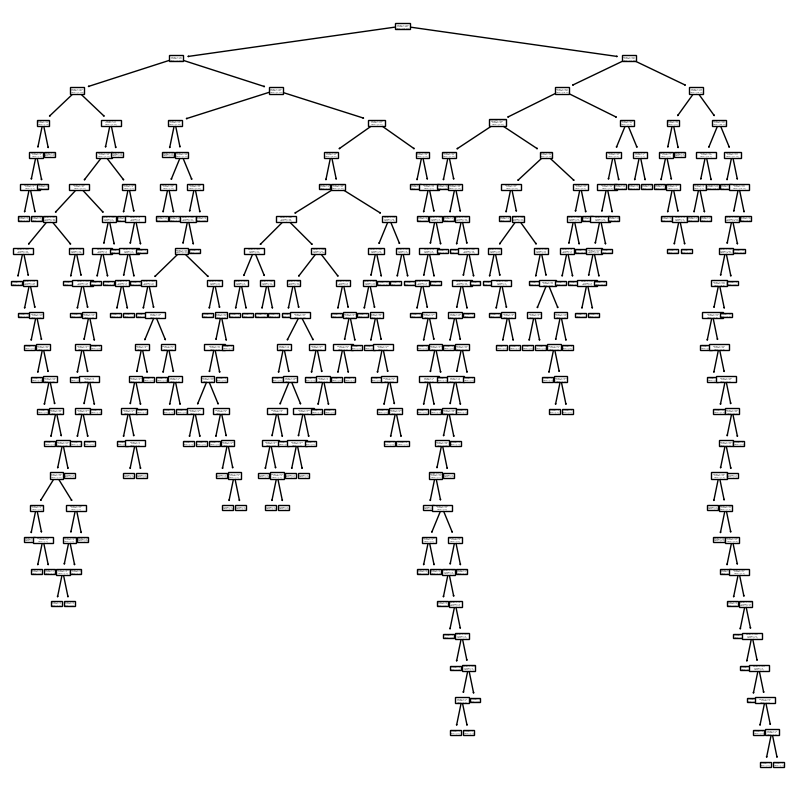

In [8]:
# c. Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
# feature name as list
feature_names = X.columns.tolist()
print(feature_names)
fig, ax = subplots(figsize=(10,10))
plot_tree(tree, ax=ax, feature_names=feature_names)
# The tree has 11 terminal nodes


In [9]:
# d. Use the export_tree() function to produce a text summary of the fitted tree. 
# Pick one of the terminal nodes, and interpret the information displayed.
print(export_text(tree, feature_names=feature_names))

|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- STORE <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- STORE >  2.50
|   |   |   |   |--- class: 1
|   |   |--- LoyalCH >  0.04
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- SalePriceCH <= 1.94
|   |   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- WeekofPurchase >  228.00
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |   | 

In [12]:
# picking a terminal node
node = 14
print(f'node {node}:')
print(export_text(tree, feature_names=feature_names, max_depth=3).split('\n')[node])
# node 14 is a terminal node with 3 samples, all of which are classified as 1 (MM)

node 14:
|   |   |   |--- PriceDiff <= -0.24


In [13]:
# e. Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. 
# What is the test error rate?
y_pred = tree.predict(X_test)
print(confusion_table(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
# test error rate
print(f'test error rate: {1-accuracy_score(y_test, y_pred)}')

Truth        0   1
Predicted         
0          123  30
1           32  85
0.7703703703703704
test error rate: 0.22962962962962963


In [32]:
# f. Use cross-validation on the training set in order to determine the optimal tree size.

# fit a tree to the training data
tree = DTC(criterion='entropy',random_state=0)
# get cross validation scores
cv_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print(cv_scores)
# get the optimal tree size
optimal_tree_size = cv_scores.argmin() + 1
print(f'optimal tree size: {optimal_tree_size}')

[0.7875 0.7625 0.8    0.75   0.7875 0.7875 0.825  0.7625 0.7125 0.725 ]


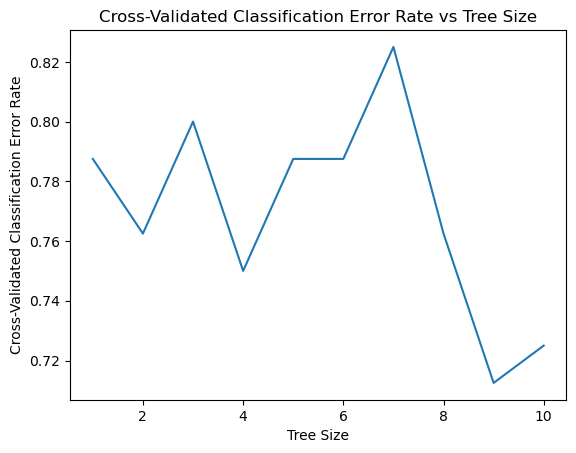

minimum cross-validated classification error rate: 0.7125


In [26]:
# g. Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, title, show
# plot the cross validation scores
plot(range(1, 11), cv_scores)
xlabel('Tree Size')
ylabel('Cross-Validated Classification Error Rate')
title('Cross-Validated Classification Error Rate vs Tree Size')
show()
# minimum cross-validated classification error rate
print(f'minimum cross-validated classification error rate: {cv_scores.min()}')

In [18]:
# h. Which tree size corresponds to the lowest cross-validated classification error rate?
# the tree size that corresponds to the lowest cross-validated classification error
print(f'tree size that corresponds to the lowest cross-validated classification error rate: {optimal_tree_size}')

tree size that corresponds to the lowest cross-validated classification error rate: 9


In [19]:
# i. Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.
# fit a tree to the training data
tree = DTC(criterion='entropy',random_state=0, max_depth=optimal_tree_size)
tree.fit(X_train, y_train)
# get the training error rate
y_pred = tree.predict(X_train)
print(confusion_table(y_train, y_pred))
print(accuracy_score(y_train, y_pred))
# training error rate
print(f'training error rate: {1-accuracy_score(y_train, y_pred)}')
# get the test error rate
y_pred = tree.predict(X_test)
print(confusion_table(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
# test error rate
print(f'test error rate: {1-accuracy_score(y_test, y_pred)}')


Truth        0    1
Predicted          
0          477   23
1           39  261
0.9225
training error rate: 0.07750000000000001
Truth        0   1
Predicted         
0          126  27
1           27  90
0.8
test error rate: 0.19999999999999996


In [ ]:
# j. Compare the training error rates between the pruned and unpruned trees. Which is higher?
# the training error rate of the pruned tree is higher than that of the unpruned tree

In [ ]:
# k. Compare the test error rates between the pruned and unpruned trees. Which is higher?
# the test error rate of the pruned tree is lower than that of the unpruned tree